In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("FertilizerCSV.csv")

In [4]:
df

,Nitrogen,Phosphorus,Potassium,Fertilizer
0,75,50,100,Urea
1,80,50,100,Urea
2,85,50,100,Urea
3,90,50,100,Urea
4,95,50,100,Urea
...,...,...,...,...
46465,80,60,115,MOP
46466,85,60,115,MOP
46467,90,60,115,MOP
46468,95,60,115,MOP


In [5]:
df.head()

,Nitrogen,Phosphorus,Potassium,Fertilizer
0,75,50,100,Urea
1,80,50,100,Urea
2,85,50,100,Urea
3,90,50,100,Urea
4,95,50,100,Urea


In [6]:
df.describe()

,Nitrogen,Phosphorus,Potassium
count,46470.000000,46470.000000,46470.000000
mean,95.379169,54.369270,64.264257
std,38.115347,16.506245,36.274665
min,20.000000,10.000000,5.000000
25%,60.000000,40.000000,40.000000
50%,105.000000,55.000000,55.000000
75%,125.000000,65.000000,75.000000
max,150.000000,90.000000,150.000000


In [7]:
print(df.columns)


Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Fertilizer'], dtype='object')


In [8]:
 df['Fertilizer'].unique()

array(['Urea', 'DAP', 'MOP', '10:26:26 NPK', 'SSP', 'Magnesium Sulphate',
       '13:32:26 NPK', '12:32:16 NPK', '50:26:26 NPK', '19:19:19 NPK',
       'Chilated Micronutrient', '18:46:00 NPK', 'Sulphur',
       '20:20:20 NPK', 'Ammonium Sulphate', 'Ferrous Sulphate',
       'White Potash', '10:10:10 NPK', 'Hydrated Lime'], dtype=object)

<Axes: xlabel='Fertilizer', ylabel='count'>

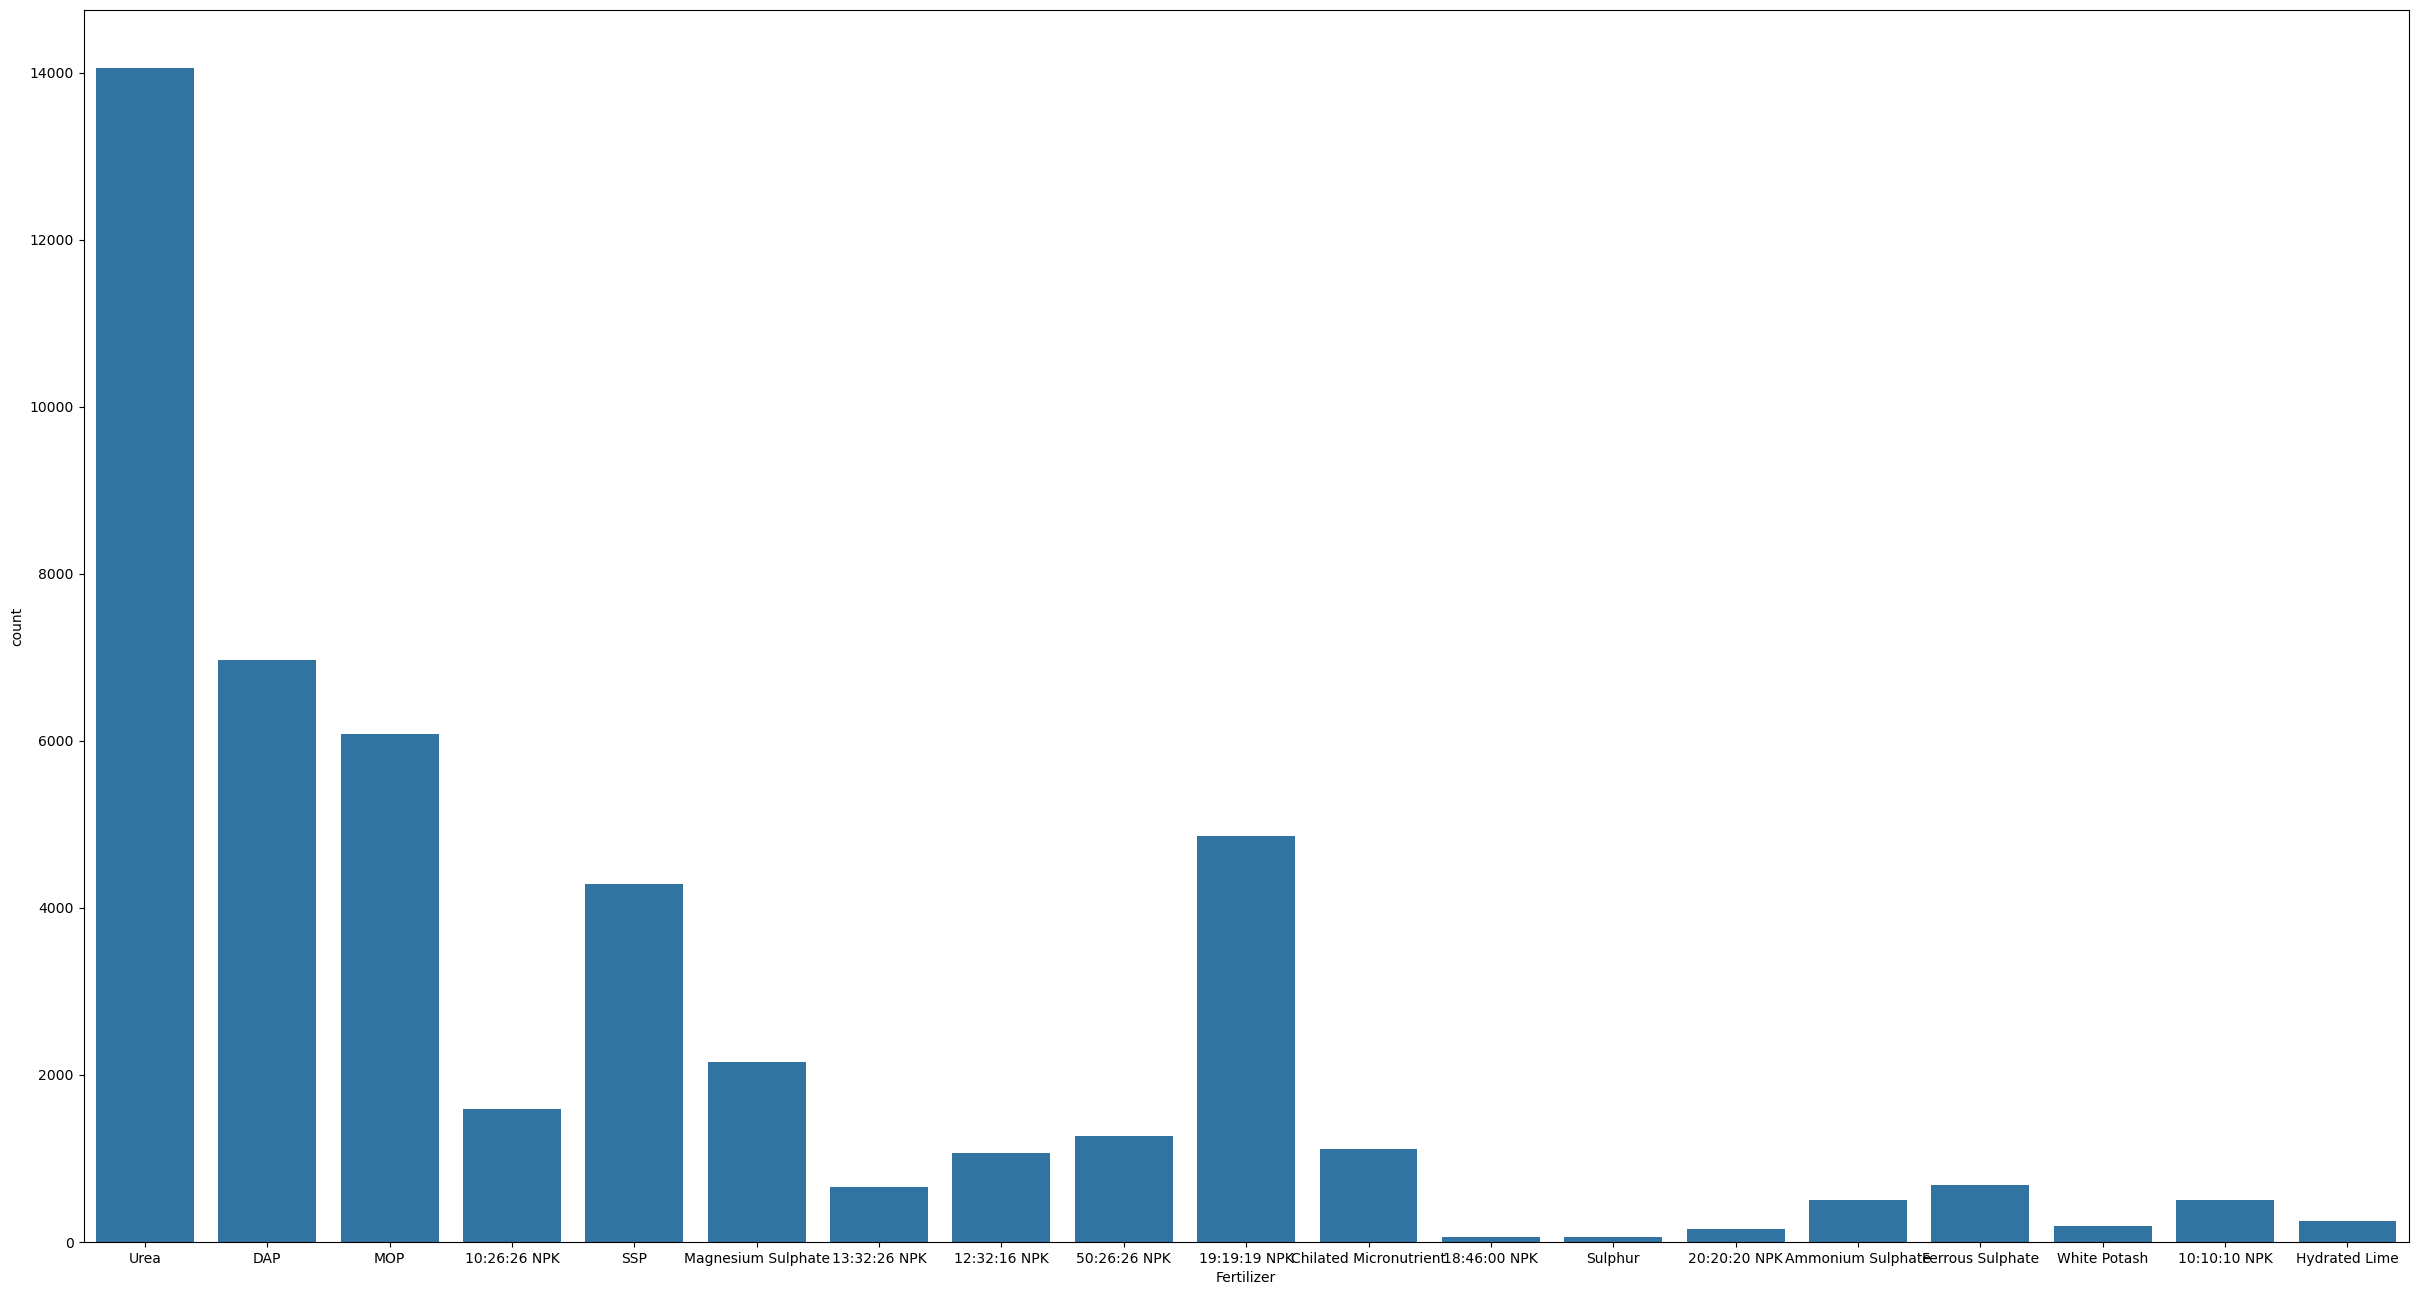

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,16))
sns.countplot(x='Fertilizer', data = df)

In [10]:
X = df.drop(columns=['Fertilizer'])
y = df['Fertilizer']


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
X_train[0]

array([1.04007639, 1.55156625, 2.22481896])

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer']=encode_ferti.fit_transform(df['Fertilizer'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
10:10:10 NPK,0
10:26:26 NPK,1
12:32:16 NPK,2
13:32:26 NPK,3
18:46:00 NPK,4
19:19:19 NPK,5
20:20:20 NPK,6
50:26:26 NPK,7
Ammonium Sulphate,8


In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer']),df['Fertilizer'],test_size=0.6,random_state=54)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (18588, 3), y_train = (18588,), x_test = (27882, 3), y_test = (27882,)


In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18588 entries, 41318 to 7279
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Nitrogen    18588 non-null  int64
 1   Phosphorus  18588 non-null  int64
 2   Potassium   18588 non-null  int64
dtypes: int64(3)
memory usage: 580.9 KB


In [19]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [20]:
pred_rand = rand.predict(x_test)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       0.49      0.53      0.51       304
           1       1.00      0.02      0.03       958
           2       0.52      0.26      0.35       622
           3       1.00      0.26      0.42       389
           4       0.00      0.00      0.00        47
           5       0.38      0.06      0.10      2897
           6       0.00      0.00      0.00        81
           7       0.00      0.00      0.00       747
           8       0.64      0.70      0.67       297
           9       0.43      0.59      0.50       663
          10       0.59      0.43      0.50      4176
          11       0.48      0.54      0.51       410
          12       0.00      0.00      0.00       156
          13       0.53      0.53      0.53      3662
          14       0.70      0.40      0.51      1274
          15       0.52      0.56      0.54      2603
          16       0

In [22]:
import pickle
pickle_out = open('classifier1.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [23]:
model = pickle.load(open('classifier1.pkl', 'rb'))
result = model.predict([[20,0,0]])
if result[0] == 0:
    print("10:10:10 NPK")
elif result[0] == 1:
    print("10:26:26 NPK")
elif result[0] == 2:
    print("12:32:16 NPK")   
elif result[0] == 3:
    print("18:46:00 NPK")
elif result[0] == 4:
    print("19:19:19 NPK")
elif result[0] == 5:
    print("20:20:20 NPK")
elif result[0] == 6:
    print("20:20:20 NPK")
elif result[0] == 7:
    print("50:26:26 NPK")
elif result[0] == 8:
    print("Ammonium Sulphate")
elif result[0] == 9:
    print("Chilated Micronutrient")
elif result[0] == 10:
    print("DAP")
elif result[0] == 11:
    print("Ferrous Sulphate")
elif result[0] == 12:
    print("Hydrated Lime")
elif result[0] == 13:
    print("MOP")
elif result[0] == 14:
    print("SSP")
elif result[0] == 15:
    print("Sulphur")
elif result[0] == 16:
    print("UREA")
elif result[0] == 17:
    print("13:32:26 NPK")
else:    
    print("White Potash	")

MOP
